In [8]:
import numpy as np, h5py
import matplotlib.pyplot as plt

# import astropy.constants as cst
# import astropy.units as u
# from astropy.cosmology import Planck15 as cosmo

from utils_cosm import MHI_Modi2019, MHI_Padmanabhan2017

Define paths of the simulation realisation <i>LH_0</i>, read redshift, cosmological and astrophysical parameter files.
</br></br>
The output folder contains sub-directories <b>LH_{i_run}</b>, each with 16 files with nomenclature <b>MHI_LH{i_run}_z={redshift[i_z]}.hdf5</b>

In [15]:
# since we are working on a restriced version of the dataset, we should ensure that i_run belongs to [0,9]
# i_z belongs to [0,15]
# i_run refers to the choice of the parameters.Then, for each choice, we have 16 subfiles corresponding to different zs

i_run, i_z = 0, 5

path_in = './outputs_test/LH_%d/' %(i_run)
path_out = path_in

redshift = np.loadtxt('./outputs_test/redshifts.txt', usecols=(1))
params = np.loadtxt('./outputs_test/params_IllustrisTNG.txt')

z = redshift[i_z]
#t_back = cosmo.lookback_time(z).to(u.Myr)
print('z=%.3f' %(z))

print('Om0	sigma8	Asn1	Aagn1	Asn2	Aagn2')
print(params[i_run])

z=1.860
Om0	sigma8	Asn1	Aagn1	Asn2	Aagn2
[0.309   0.979   3.11234 1.12194 0.6685  0.53182]


Each file contains a list of halos at a particular time <b>z</b> in the Universe hystory 
<ul>
    <li><b>MassHalo:</b> mass of the halo (in solar mass unit)</li>
    <li><b>VelHalo:</b> x,y and z-axis velocit of the halo</li>
    <li><b>Nsubs:</b> number of galaxies within each halo</li>
    <li><b>MassBH:</b> cumulative balck hole mass within the halo (in solar mass units)</li>
    <li><b>dotMassBH:</b> black hole accreation mass (in solar mass per year units)</li>
    <li><b>PosHalo:</b> position of the center of mass position of the halo</li>
    <li><b>MetalsGas:</b> fraction of metals in the gas within the halo</li>
    <li><b>MetalsStar:</b> fraction of metals in the stars within the halo</li>
    <li><b>SFR:</b> star formation rate (in solar mass per year units)</li>
    <li><b>M_HI:</b> neutral hydrogen mass within the halo</li>
</ul> 

In [31]:
f = h5py.File('%sMHI_LH%d_z=%.3f.hdf5' %(path_in, i_run, z))
mHalo = f['MassHalo'][:]
mHI = f['M_HI'][:]
f.close()

In [33]:
mass = np.logspace(8, 14, 1000)
mHI_modelA = MHI_Modi2019(Mh=mass, z=z, model='A')
mHI_modelC = MHI_Modi2019(Mh=mass, z=z, model='C')

mHI_Pad = MHI_Padmanabhan2017(Mh=mass, z=z, Om0=params[i_run, 0], delta_c=200.)

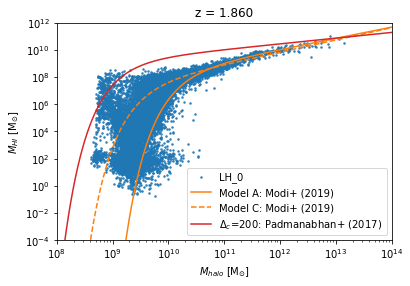

(None, None)

<Figure size 432x288 with 0 Axes>

In [34]:
plt.title('z = %.3f' %z)

plt.scatter(x=mHalo, y=mHI, s=10, color='tab:blue', label=r'LH_%d' %i_run, marker='.', alpha=0.8)
plt.plot(mass, mHI_modelA, label='Model A: Modi+ (2019)', color='tab:orange', ls='-')
plt.plot(mass, mHI_modelC, label='Model C: Modi+ (2019)', color='tab:orange', ls='--')
plt.plot(mass, mHI_Pad, label=r'$\Delta_c$=200: Padmanabhan+ (2017)', color='tab:red', ls='-')

plt.xscale('log'), plt.yscale('log')
plt.xlim(1e8, 1e14), plt.ylim(1e-4, 1e12)
plt.xlabel(r'$M_{halo}$ $\rm{[M_{\odot}]}$')
plt.ylabel(r'$M_{HI}$ $\rm{[M_{\odot}]}$')
plt.legend(loc=4)

plt.savefig('%scompare_MHI_LH%d_z%.3f.png' %(path_out, i_run, z), bbox_inches='tight', facecolor='white')
plt.show(), plt.clf()